<a href="https://colab.research.google.com/github/ptrzky/Machine-Learning/blob/main/Seabornl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Putri Rezky Ameilya B  | H071201078

# **Seaborn**


Seaborn adalah library untuk membuat grafik dan statistik dengan menggunakan Python. 

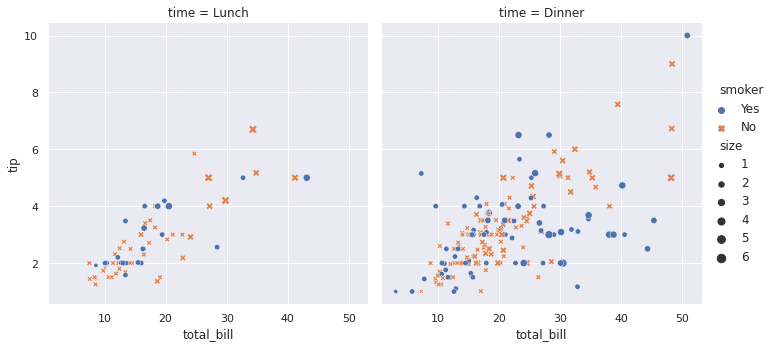

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
# Import seaborn
import seaborn as sns

Di balik layar, seaborn menggunakan matplotlib untuk menggambar plotnya. Untuk pekerjaan interaktif, disarankan untuk menggunakan antarmuka Jupyter/IPython dalam mode matplotlib, atau Anda harus memanggil matplotlib.pyplot.show() saat Anda ingin melihat plotnya.

In [ ]:
# Apply the default theme
sns.set_theme()

In [ ]:
# Load an example dataset
tips = sns.load_dataset("tips")

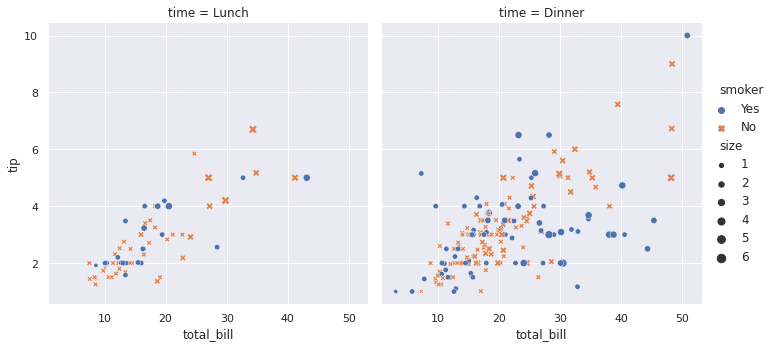

In [ ]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

## **A high-level API for statistical graphics**

Fungsi relplot() dinamai demikian karena dirancang untuk memvisualisasikan banyak hubungan statistik yang berbeda. Sementara plot sebar sering efektif, hubungan di mana satu variabel mewakili ukuran waktu lebih baik diwakili oleh garis. Fungsi relplot() memiliki parameter jenis yang mudah digunakan yang memungkinkan Anda dengan mudah beralih ke representasi alternatif ini:

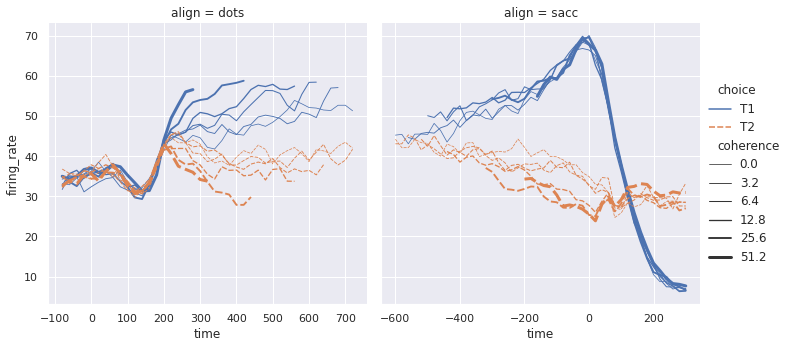

In [ ]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

## **Statistical estimation**

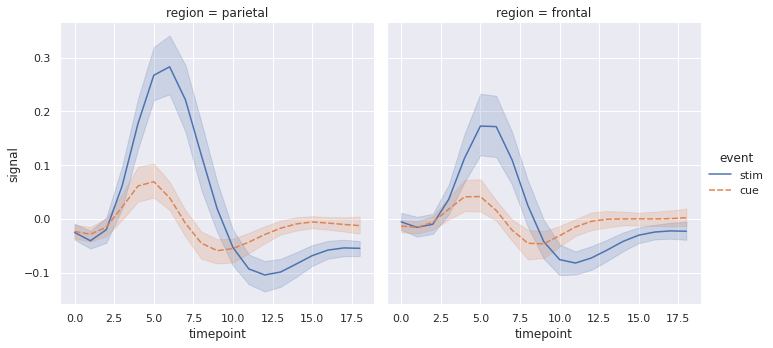

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

Estimasi statistik di seaborn melampaui statistik deskriptif. Misalnya, dimungkinkan untuk meningkatkan sebar dengan memasukkan model regresi linier (dan ketidakpastiannya) menggunakan lmplot():

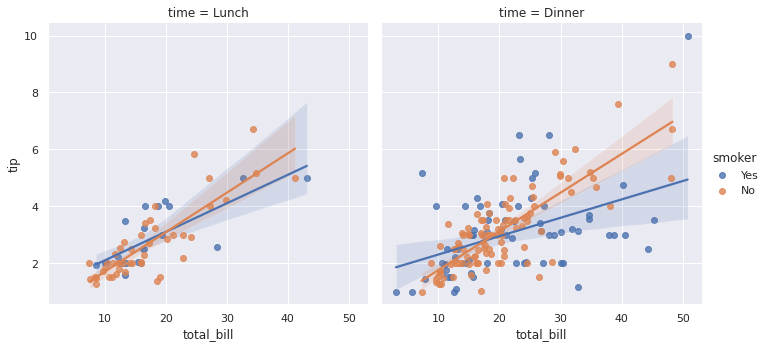

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## **Distributional representations**

Analisis statistik memerlukan pengetahuan tentang distribusi variabel dalam kumpulan data Anda. Fungsi seaborn displot() mendukung beberapa pendekatan untuk memvisualisasikan distribusi. Ini termasuk teknik klasik seperti histogram dan pendekatan komputasi intensif seperti estimasi kepadatan kernel:

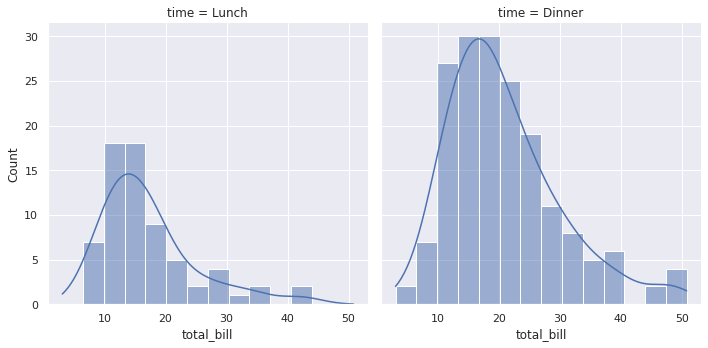

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn juga mencoba untuk mempromosikan teknik yang kuat tetapi kurang familiar, seperti menghitung dan memplot fungsi distribusi kumulatif empiris dari data:

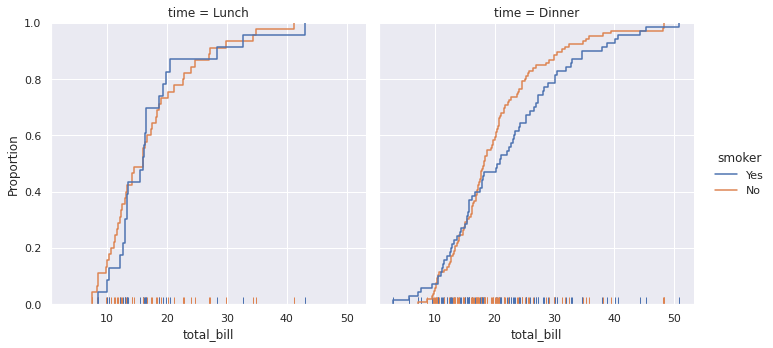

In [ ]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

## **Plots for categorical data**

Beberapa tipe plot khusus di seaborn berorientasi pada visualisasi data kategorikal. Mereka dapat diakses melalui catplot(). Plot ini menawarkan tingkat perincian yang berbeda.

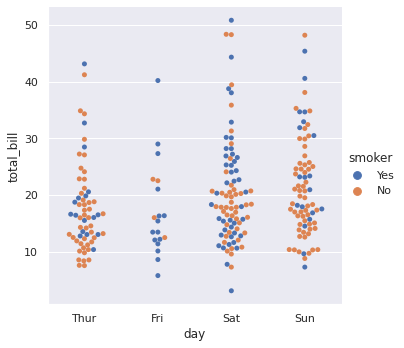

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

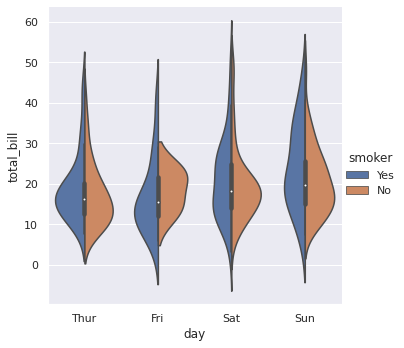

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

Atau Anda hanya dapat menampilkan nilai rata-rata dan interval kepercayaannya dalam setiap kategori bersarang:

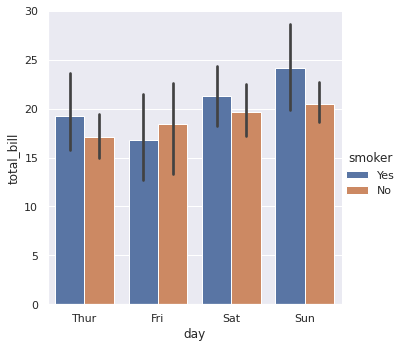

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

## **Multivariate views on complex datasets**

Beberapa fungsi seaborn menggabungkan beberapa jenis plot untuk dengan cepat memberikan ringkasan informatif dari kumpulan data. Satu, jointplot(), berfokus pada satu hubungan. Ini memplot distribusi bersama antara dua variabel bersama dengan distribusi marjinal masing-masing variabel:

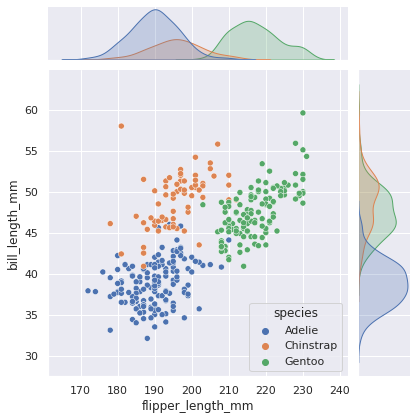

In [ ]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

pairplot(), mengambil pandangan yang lebih luas: ini menunjukkan distribusi bersama dan marginal untuk semua hubungan berpasangan dan untuk setiap variabel, masing-masing

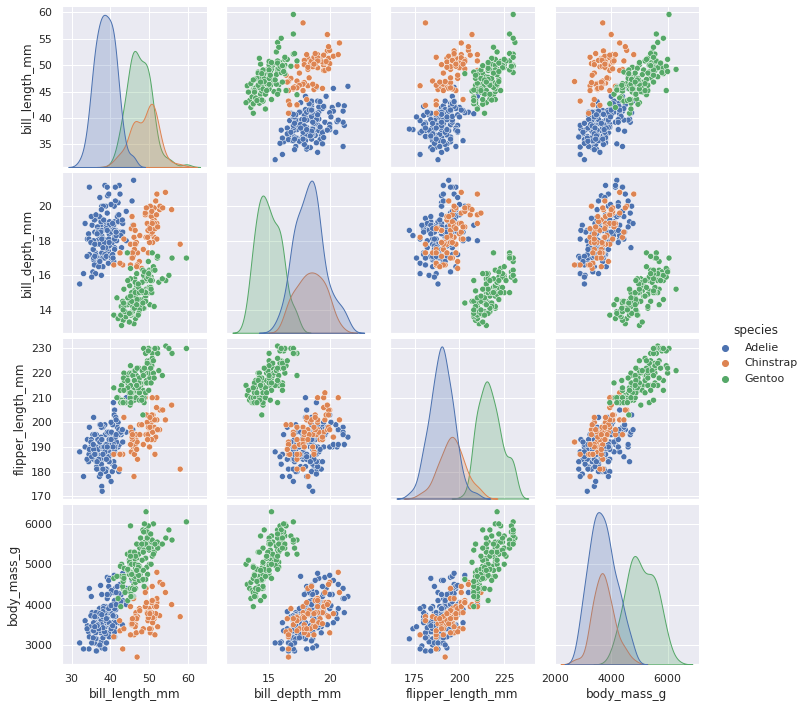

In [ ]:
sns.pairplot(data=penguins, hue="species")

## **Lower-level tools for building figures**

Alat ini bekerja dengan menggabungkan fungsi plot tingkat sumbu dengan objek yang mengelola tata letak gambar, menghubungkan struktur kumpulan data ke kisi sumbu.

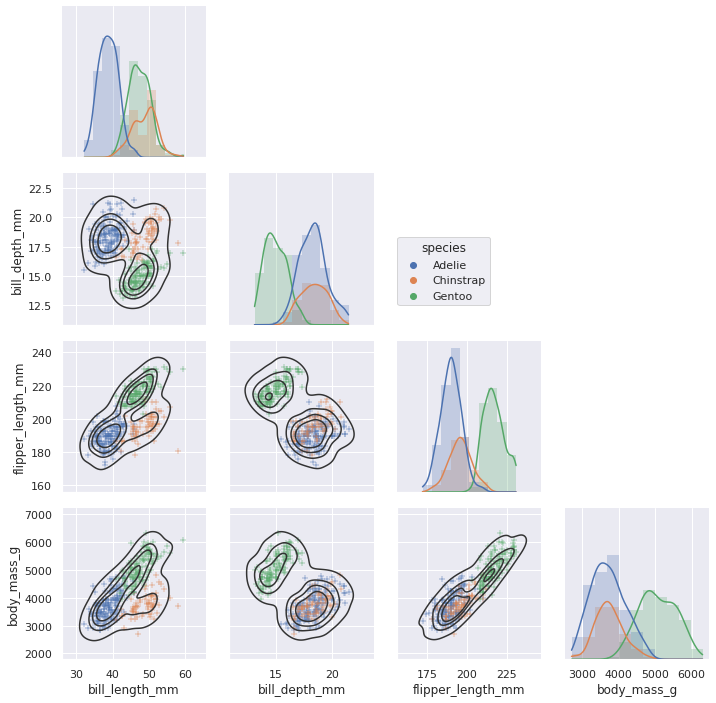

In [ ]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

## **Opinionated defaults and flexible customization**

Seaborn membuat grafik lengkap dengan satu panggilan fungsi: jika memungkinkan, fungsinya akan secara otomatis menambahkan label sumbu informatif dan legenda yang menjelaskan pemetaan semantik dalam plot.

Dalam banyak kasus, seaborn juga akan memilih nilai default untuk parameternya berdasarkan karakteristik data. Misalnya, pemetaan warna yang telah kita lihat sejauh ini menggunakan rona yang berbeda (biru, jingga, dan terkadang hijau) untuk mewakili tingkat variabel kategori yang berbeda yang ditetapkan ke rona. Saat memetakan variabel numerik, beberapa fungsi akan beralih ke gradien berkelanjutan

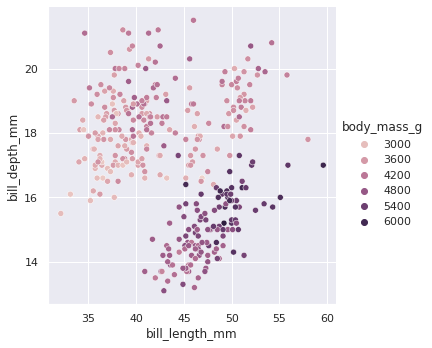

In [ ]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

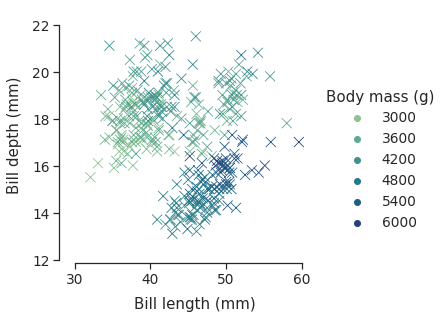

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)